# Восстановление золота из руды

## Подготовка данных

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.metrics import mean_absolute_error
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import make_scorer
from sklearn.dummy import DummyRegressor

In [2]:
pd.set_option('display.max_rows', None)

In [3]:
try:
    data_train = pd.read_csv('gold_recovery_train_new.csv')
    data_test = pd.read_csv('gold_recovery_test_new.csv')
    data_full = pd.read_csv('gold_recovery_full_new.csv')
    
except:
    print('Ошибка загрузки данных')

In [4]:
for d, i in [(data_train, 'train'), (data_test, 'test'), (data_full, 'full')]:
    print(f'Информация для data_{i}')
    print('*' * 25)
    display(d.head())
    print(d.info(), end='\n\n')
    print('Количество пропусков:', end='\n\n')
    print(d.isna().sum(), end='\n\n')
    print(f'Количество полных дубликатов: {d.duplicated().sum()}', end='\n\n')

Информация для data_train
*************************


date  final.output.concentrate_ag  \
0  2016-01-15 00:00:00                     6.055403   
1  2016-01-15 01:00:00                     6.029369   
2  2016-01-15 02:00:00                     6.055926   
3  2016-01-15 03:00:00                     6.047977   
4  2016-01-15 04:00:00                     6.148599   

   final.output.concentrate_pb  final.output.concentrate_sol  \
0                     9.889648                      5.507324   
1                     9.968944                      5.257781   
2                    10.213995                      5.383759   
3                     9.977019                      4.858634   
4                    10.142511                      4.939416   

   final.output.concentrate_au  final.output.recovery  final.output.tail_ag  \
0                    42.192020              70.541216             10.411962   
1                    42.701629              69.266198             10.462676   
2                    42.657501              68.116445             10.507046   
3                    42.689819              68.347543             10.422762   
4                    42.774141              66.927016             10.360302   

   final.output.tail_pb  final.output.tail_sol  final.output.tail_au  ...  \
0              0.895447              16.904297              2.143149  ...   
1              0.927452              16.634514              2.224930  ...   
2              0.953716              16.208849              2.257889  ...   
3              0.883763              16.532835              2.146849  ...   
4              0.792826              16.525686              2.055292  ...   

   secondary_cleaner.state.floatbank4_a_air  \
0                                 14.016835   
1                                 13.992281   
2                                 14.015015   
3                                 14.036510   
4                                 14.027298   

   secondary_cleaner.state.floatbank4_a_level  \
0                                 -502.488007   
1                                 -505.503262   
2                                 -502.520901   
3                                 -500.857308   
4                                 -499.838632   

   secondary_cleaner.state.floatbank4_b_air  \
0                                 12.099931   
1                                 11.950531   
2                                 11.912783   
3                                 11.999550   
4                                 11.953070   

   secondary_cleaner.state.floatbank4_b_level  \
0                                 -504.715942   
1                                 -501.331529   
2                                 -501.133383   
3                                 -501.193686   
4                                 -501.053894   

   secondary_cleaner.state.floatbank5_a_air  \
0                                  9.925633   
1                                 10.039245   
2                                 10.070913   
3                                  9.970366   
4                                  9.925709   

   secondary_cleaner.state.floatbank5_a_level  \
0                                 -498.310211   
1                                 -500.169983   
2                                 -500.129135   
3                                 -499.201640   
4                                 -501.686727   

   secondary_cleaner.state.floatbank5_b_air  \
0                                  8.079666   
1                                  7.984757   
2                                  8.013877   
3                                  7.977324   
4                                  7.894242   

   secondary_cleaner.state.floatbank5_b_level  \
0                                 -500.470978   
1                                 -500.582168   
2                                 -500.517572   
3                                 -500.255908   
4                                 -500.356035   

   secondary_cleaner.state.floatbank6_a_air  \
0    

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14149 entries, 0 to 14148
Data columns (total 87 columns):
 #   Column                                              Non-Null Count  Dtype  
---  ------                                              --------------  -----  
 0   date                                                14149 non-null  object 
 1   final.output.concentrate_ag                         14148 non-null  float64
 2   final.output.concentrate_pb                         14148 non-null  float64
 3   final.output.concentrate_sol                        13938 non-null  float64
 4   final.output.concentrate_au                         14149 non-null  float64
 5   final.output.recovery                               14149 non-null  float64
 6   final.output.tail_ag                                14149 non-null  float64
 7   final.output.tail_pb                                14049 non-null  float64
 8   final.output.tail_sol                               14144 non-null  float64


date  primary_cleaner.input.sulfate  \
0  2016-09-01 00:59:59                     210.800909   
1  2016-09-01 01:59:59                     215.392455   
2  2016-09-01 02:59:59                     215.259946   
3  2016-09-01 03:59:59                     215.336236   
4  2016-09-01 04:59:59                     199.099327   

   primary_cleaner.input.depressant  primary_cleaner.input.feed_size  \
0                         14.993118                         8.080000   
1                         14.987471                         8.080000   
2                         12.884934                         7.786667   
3                         12.006805                         7.640000   
4                         10.682530                         7.530000   

   primary_cleaner.input.xanthate  primary_cleaner.state.floatbank8_a_air  \
0                        1.005021                             1398.981301   
1                        0.990469                             1398.777912   
2                        0.996043                             1398.493666   
3                        0.863514                             1399.618111   
4                        0.805575                             1401.268123   

   primary_cleaner.state.floatbank8_a_level  \
0                               -500.225577   
1                               -500.057435   
2                               -500.868360   
3                               -498.863574   
4                               -500.808305   

   primary_cleaner.state.floatbank8_b_air  \
0                             1399.144926   
1                             1398.055362   
2                             1398.860436   
3                             1397.440120   
4                             1398.128818   

   primary_cleaner.state.floatbank8_b_level  \
0                               -499.919735   
1                               -499.778182   
2                               -499.764529   
3                               -499.211024   
4                               -499.504543   

   primary_cleaner.state.floatbank8_c_air  ...  \
0                             1400.102998  ...   
1                             1396.151033  ...   
2                             1398.075709  ...   
3                             1400.129303  ...   
4                             1402.172226  ...   

   secondary_cleaner.state.floatbank4_a_air  \
0                                 12.023554   
1                                 12.058140   
2                                 11.962366   
3                                 12.033091   
4                                 12.025367   

   secondary_cleaner.state.floatbank4_a_level  \
0                                 -497.795834   
1                                 -498.695773   
2                                 -498.767484   
3                                 -498.350935   
4                                 -500.786497   

   secondary_cleaner.state.floatbank4_b_air  \
0                                  8.016656   
1                                  8.130979   
2                                  8.096893   
3                                  8.074946   
4                                  8.054678   

   secondary_cleaner.state.floatbank4_b_level  \
0                                 -501.289139   
1                                 -499.634209   
2                                 -500.827423   
3                                 -499.474407   
4                                 -500.397500   

   secondary_cleaner.state.floatbank5_a_air  \
0                                  7.946562   
1                                  7.958270   
2                                  8.071056   
3                                  7.897085   
4                                  8.107890   

   secondary_cleaner.state.floatbank5_a_level  \
0                                 -432.317850   
1                                 -525.839648   
2                                 -500.801673   
3     

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5290 entries, 0 to 5289
Data columns (total 53 columns):
 #   Column                                      Non-Null Count  Dtype  
---  ------                                      --------------  -----  
 0   date                                        5290 non-null   object 
 1   primary_cleaner.input.sulfate               5286 non-null   float64
 2   primary_cleaner.input.depressant            5285 non-null   float64
 3   primary_cleaner.input.feed_size             5290 non-null   float64
 4   primary_cleaner.input.xanthate              5286 non-null   float64
 5   primary_cleaner.state.floatbank8_a_air      5290 non-null   float64
 6   primary_cleaner.state.floatbank8_a_level    5290 non-null   float64
 7   primary_cleaner.state.floatbank8_b_air      5290 non-null   float64
 8   primary_cleaner.state.floatbank8_b_level    5290 non-null   float64
 9   primary_cleaner.state.floatbank8_c_air      5290 non-null   float64
 10  primary_clea

date  final.output.concentrate_ag  \
0  2016-01-15 00:00:00                     6.055403   
1  2016-01-15 01:00:00                     6.029369   
2  2016-01-15 02:00:00                     6.055926   
3  2016-01-15 03:00:00                     6.047977   
4  2016-01-15 04:00:00                     6.148599   

   final.output.concentrate_pb  final.output.concentrate_sol  \
0                     9.889648                      5.507324   
1                     9.968944                      5.257781   
2                    10.213995                      5.383759   
3                     9.977019                      4.858634   
4                    10.142511                      4.939416   

   final.output.concentrate_au  final.output.recovery  final.output.tail_ag  \
0                    42.192020              70.541216             10.411962   
1                    42.701629              69.266198             10.462676   
2                    42.657501              68.116445             10.507046   
3                    42.689819              68.347543             10.422762   
4                    42.774141              66.927016             10.360302   

   final.output.tail_pb  final.output.tail_sol  final.output.tail_au  ...  \
0              0.895447              16.904297              2.143149  ...   
1              0.927452              16.634514              2.224930  ...   
2              0.953716              16.208849              2.257889  ...   
3              0.883763              16.532835              2.146849  ...   
4              0.792826              16.525686              2.055292  ...   

   secondary_cleaner.state.floatbank4_a_air  \
0                                 14.016835   
1                                 13.992281   
2                                 14.015015   
3                                 14.036510   
4                                 14.027298   

   secondary_cleaner.state.floatbank4_a_level  \
0                                 -502.488007   
1                                 -505.503262   
2                                 -502.520901   
3                                 -500.857308   
4                                 -499.838632   

   secondary_cleaner.state.floatbank4_b_air  \
0                                 12.099931   
1                                 11.950531   
2                                 11.912783   
3                                 11.999550   
4                                 11.953070   

   secondary_cleaner.state.floatbank4_b_level  \
0                                 -504.715942   
1                                 -501.331529   
2                                 -501.133383   
3                                 -501.193686   
4                                 -501.053894   

   secondary_cleaner.state.floatbank5_a_air  \
0                                  9.925633   
1                                 10.039245   
2                                 10.070913   
3                                  9.970366   
4                                  9.925709   

   secondary_cleaner.state.floatbank5_a_level  \
0                                 -498.310211   
1                                 -500.169983   
2                                 -500.129135   
3                                 -499.201640   
4                                 -501.686727   

   secondary_cleaner.state.floatbank5_b_air  \
0                                  8.079666   
1                                  7.984757   
2                                  8.013877   
3                                  7.977324   
4                                  7.894242   

   secondary_cleaner.state.floatbank5_b_level  \
0                                 -500.470978   
1                                 -500.582168   
2                                 -500.517572   
3                                 -500.255908   
4                                 -500.356035   

   secondary_cleaner.state.floatbank6_a_air  \
0    

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19439 entries, 0 to 19438
Data columns (total 87 columns):
 #   Column                                              Non-Null Count  Dtype  
---  ------                                              --------------  -----  
 0   date                                                19439 non-null  object 
 1   final.output.concentrate_ag                         19438 non-null  float64
 2   final.output.concentrate_pb                         19438 non-null  float64
 3   final.output.concentrate_sol                        19228 non-null  float64
 4   final.output.concentrate_au                         19439 non-null  float64
 5   final.output.recovery                               19439 non-null  float64
 6   final.output.tail_ag                                19438 non-null  float64
 7   final.output.tail_pb                                19338 non-null  float64
 8   final.output.tail_sol                               19433 non-null  float64


**Расчёт эффективности обогащения**

In [5]:
data_train_recovery = data_train.dropna().reset_index(drop=True)[['rougher.output.concentrate_au', 
                                                                  'rougher.input.feed_au', 
                                                                  'rougher.output.tail_au', 
                                                                  'rougher.output.recovery']]

def calculated_recovery(row):
    c = row['rougher.output.concentrate_au']
    f = row['rougher.input.feed_au']
    t = row['rougher.output.tail_au']    
    
    return ((c * (f - t)) / (f * (c - t))) * 100


data_train_recovery['calculated_recovery'] = data_train_recovery.apply(calculated_recovery, axis=1)

print(mean_absolute_error(data_train_recovery['rougher.output.recovery'], data_train_recovery['calculated_recovery']))

9.82970122149377e-15


Среднего абсолютное отклонение крайне мало. Следовательно эффективность обогащения рассчитана верно.

**Анализ признаков, недоступных в тестовой выборке**

In [6]:
# вывод признаков, недоступных в тестовой выборке

for i in data_train.columns:
    if i not in data_test.columns:
        print(i)

final.output.concentrate_ag
final.output.concentrate_pb
final.output.concentrate_sol
final.output.concentrate_au
final.output.recovery
final.output.tail_ag
final.output.tail_pb
final.output.tail_sol
final.output.tail_au
primary_cleaner.output.concentrate_ag
primary_cleaner.output.concentrate_pb
primary_cleaner.output.concentrate_sol
primary_cleaner.output.concentrate_au
primary_cleaner.output.tail_ag
primary_cleaner.output.tail_pb
primary_cleaner.output.tail_sol
primary_cleaner.output.tail_au
rougher.calculation.sulfate_to_au_concentrate
rougher.calculation.floatbank10_sulfate_to_au_feed
rougher.calculation.floatbank11_sulfate_to_au_feed
rougher.calculation.au_pb_ratio
rougher.output.concentrate_ag
rougher.output.concentrate_pb
rougher.output.concentrate_sol
rougher.output.concentrate_au
rougher.output.recovery
rougher.output.tail_ag
rougher.output.tail_pb
rougher.output.tail_sol
rougher.output.tail_au
secondary_cleaner.output.tail_ag
secondary_cleaner.output.tail_pb
secondary_cleaner.

Признаки, отсутствующие в тестовой выборке - это признаки, получаемые в процессе флотации и после неё. Так как предсказания эффективности модели необходимо получить до начала технологического процесса, модель нужно обучить без этих признаков, из-за чего они и отсутствуют в тестовой выборке.

**Обработка пропусков**

В условиях проекта сказано, что соседние по времени параметры часто похожи. Поэтому заполним пропуски методом `ffill`, используя данные предыдушей строки.

In [7]:
data_train = data_train.ffill(axis=0)
data_test = data_test.ffill(axis=0)
data_full = data_full.ffill(axis=0)

for d, i in [(data_train, 'train'), (data_test, 'test'), (data_full, 'full')]:
    print(f'Информация для data_{i}')
    print('*' * 55)
    print('Количество пропусков:', end='\n\n')
    print(d.isna().sum(), end='\n\n')

Информация для data_train
*******************************************************
Количество пропусков:

date                                                  0
final.output.concentrate_ag                           0
final.output.concentrate_pb                           0
final.output.concentrate_sol                          0
final.output.concentrate_au                           0
final.output.recovery                                 0
final.output.tail_ag                                  0
final.output.tail_pb                                  0
final.output.tail_sol                                 0
final.output.tail_au                                  0
primary_cleaner.input.sulfate                         0
primary_cleaner.input.depressant                      0
primary_cleaner.input.feed_size                       0
primary_cleaner.input.xanthate                        0
primary_cleaner.output.concentrate_ag                 0
primary_cleaner.output.concentrate_pb                 0

<div class="alert alert-success">
<h2> Комментарий ревьюера <a class="tocSkip"> </h2>

<b>Все отлично!👍:</b> Обработали пропуски с помощью стратегии заполнения `forward fill`, а также пояснили причину выбора такой стратегии - отлично!
</div>

**Добавление столбцов с целевым признаком в `data_test`**

In [8]:
target_data = data_full[['date', 'final.output.recovery', 'rougher.output.recovery']]
data_test = data_test.merge(target_data, on='date', how='left')
data_test.head()

date  primary_cleaner.input.sulfate  \
0  2016-09-01 00:59:59                     210.800909   
1  2016-09-01 01:59:59                     215.392455   
2  2016-09-01 02:59:59                     215.259946   
3  2016-09-01 03:59:59                     215.336236   
4  2016-09-01 04:59:59                     199.099327   

   primary_cleaner.input.depressant  primary_cleaner.input.feed_size  \
0                         14.993118                         8.080000   
1                         14.987471                         8.080000   
2                         12.884934                         7.786667   
3                         12.006805                         7.640000   
4                         10.682530                         7.530000   

   primary_cleaner.input.xanthate  primary_cleaner.state.floatbank8_a_air  \
0                        1.005021                             1398.981301   
1                        0.990469                             1398.777912   
2                        0.996043                             1398.493666   
3                        0.863514                             1399.618111   
4                        0.805575                             1401.268123   

   primary_cleaner.state.floatbank8_a_level  \
0                               -500.225577   
1                               -500.057435   
2                               -500.868360   
3                               -498.863574   
4                               -500.808305   

   primary_cleaner.state.floatbank8_b_air  \
0                             1399.144926   
1                             1398.055362   
2                             1398.860436   
3                             1397.440120   
4                             1398.128818   

   primary_cleaner.state.floatbank8_b_level  \
0                               -499.919735   
1                               -499.778182   
2                               -499.764529   
3                               -499.211024   
4                               -499.504543   

   primary_cleaner.state.floatbank8_c_air  ...  \
0                             1400.102998  ...   
1                             1396.151033  ...   
2                             1398.075709  ...   
3                             1400.129303  ...   
4                             1402.172226  ...   

   secondary_cleaner.state.floatbank4_b_air  \
0                                  8.016656   
1                                  8.130979   
2                                  8.096893   
3                                  8.074946   
4                                  8.054678   

   secondary_cleaner.state.floatbank4_b_level  \
0                                 -501.289139   
1                                 -499.634209   
2                                 -500.827423   
3                                 -499.474407   
4                                 -500.397500   

   secondary_cleaner.state.floatbank5_a_air  \
0                                  7.946562   
1                                  7.958270   
2                                  8.071056   
3                                  7.897085   
4                                  8.107890   

   secondary_cleaner.state.floatbank5_a_level  \
0                                 -432.317850   
1                                 -525.839648   
2                                 -500.801673   
3                                 -500.868509   
4                                 -509.526725   

   secondary_cleaner.state.floatbank5_b_air  \
0                                  4.872511   
1                                  4.878850   
2                                  4.905125   
3                                  4.931400   
4                                  4.957674   

   secondary_cleaner.state.floatbank5_b_level  \
0                                 -500.037437   
1                                 -500.162375   
2                                 -499.828510   
3     

Столбец с датой далее не понадобится в исследованиях, удалим его во всех датасетах.

In [9]:
data_train = data_train.drop('date', axis=1)
data_test = data_test.drop('date', axis=1)
data_full = data_full.drop('date', axis=1)

**Вывод**

Проведена подготовка данных: данные проверены на дубликаты и пропуски, выполнено заполнение пропусков методом, проверена корректность расчёта эффективности обогащения, проанализированы отсутствующие и добавлены необходимые столбцы в data_test.

## Анализ данных

**Исследование изменения концентраций металлов (Au, Ag, Pb) на различных этапах очистки**

*Исследование изменения концентрации золота*

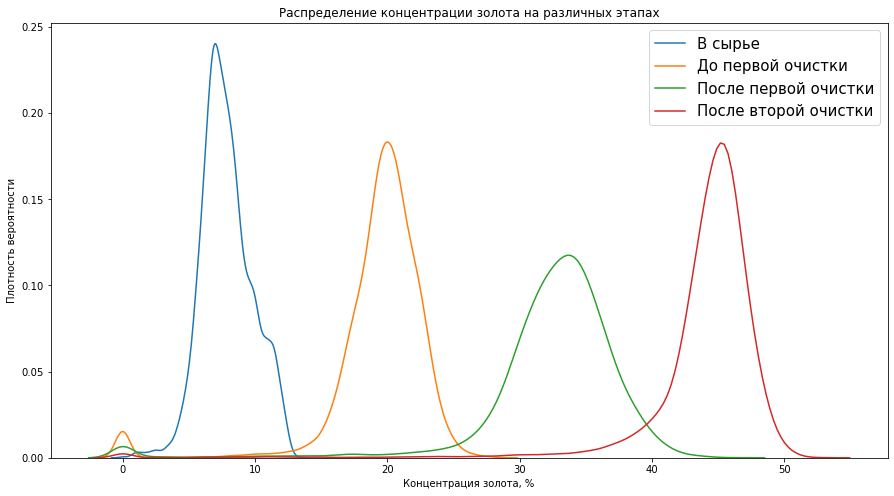

In [10]:
f, ax = plt.subplots(figsize=(15, 8))
ax.set_title('Распределение концентрации золота на различных этапах')
ax.set_xlabel('Концентрация золота, %')
ax.set_ylabel('Плотность вероятности')

sns.kdeplot(data_train['rougher.input.feed_au'], label='В сырье', ax=ax)
sns.kdeplot(data_train['rougher.output.concentrate_au'], label='До первой очистки', ax=ax)
sns.kdeplot(data_train['primary_cleaner.output.concentrate_au'], label='После первой очистки', ax=ax)
sns.kdeplot(data_train['final.output.concentrate_au'], label='После второй очистки', ax=ax)
plt.legend(fontsize = 15)

plt.show()

При прохождении этапов очистки концентрация золота увеличилась. После второй очистки не только увеличилась концентрация, но и уменьшился разброс значений концентрации. 

*Исследование изменения концентрации серебра* 

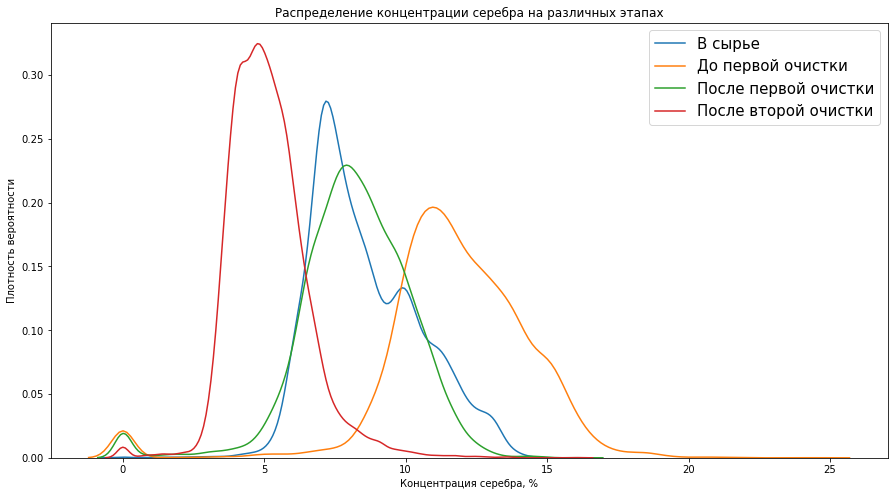

In [11]:
f, ax = plt.subplots(figsize=(15, 8))
ax.set_title('Распределение концентрации серебра на различных этапах')
ax.set_xlabel('Концентрация серебра, %')
ax.set_ylabel('Плотность вероятности')

sns.kdeplot(data_train['rougher.input.feed_ag'], label='В сырье', ax=ax)
sns.kdeplot(data_train['rougher.output.concentrate_ag'], label='До первой очистки', ax=ax)
sns.kdeplot(data_train['primary_cleaner.output.concentrate_ag'], label='После первой очистки', ax=ax)
sns.kdeplot(data_train['final.output.concentrate_ag'], label='После второй очистки', ax=ax)
plt.legend(fontsize = 15)
plt.show()

После прохождений этапов очистки концентрация серебра уменьшилась. После второй очистки уменьшился разброс значений концентрации. 

*Исследование изменения концентрации свинца*

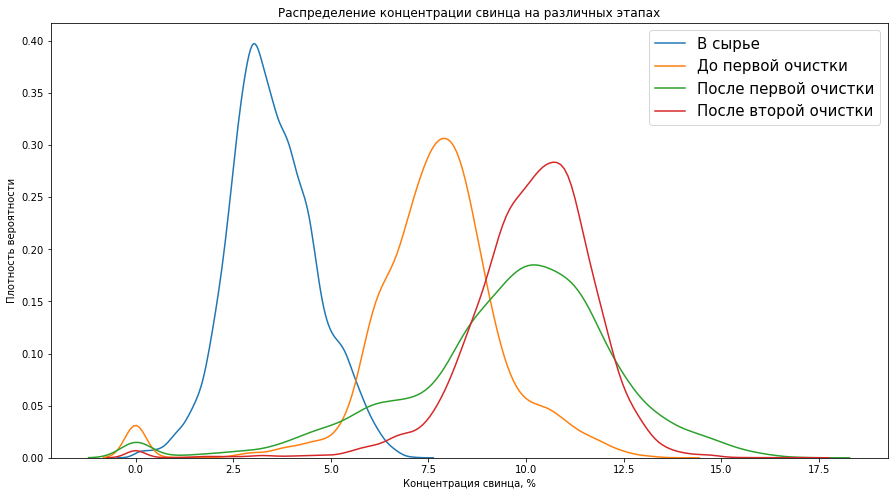

In [12]:
f, ax = plt.subplots(figsize=(15, 8))
ax.set_title('Распределение концентрации свинца на различных этапах')
ax.set_xlabel('Концентрация свинца, %')
ax.set_ylabel('Плотность вероятности')

sns.kdeplot(data_train['rougher.input.feed_pb'], label='В сырье', ax=ax)
sns.kdeplot(data_train['rougher.output.concentrate_pb'], label='До первой очистки', ax=ax)
sns.kdeplot(data_train['primary_cleaner.output.concentrate_pb'], label='После первой очистки', ax=ax)
sns.kdeplot(data_train['final.output.concentrate_pb'], label='После второй очистки', ax=ax)
plt.legend(fontsize = 15)
plt.show()

После прохождения этапов очистки концентрация свинца увеличивается. После второй очистки уменьшился разброс значений концентрации.

Таким образом, для всех трёх металлов после двух очисток разброс значений концентраций уменьшился. Максимум значений распределения для золота и свинца сместился в сторону бОльших значений, для серебра - в сторону меньших. Также для всех трёх металлов наблюдается небольшой пик возле нулевого значения концентрации, что можно считать выбросом. 

**Анализ распределения размеров гранул на обучающей и тестовой выборках**

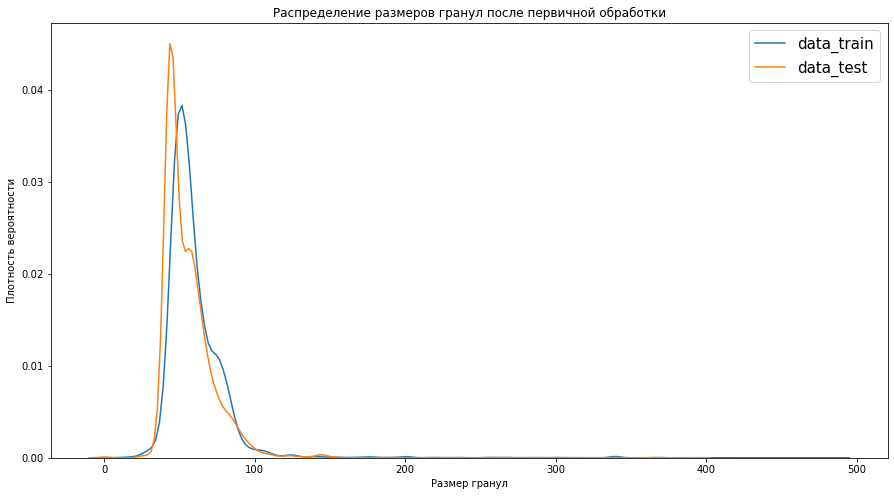

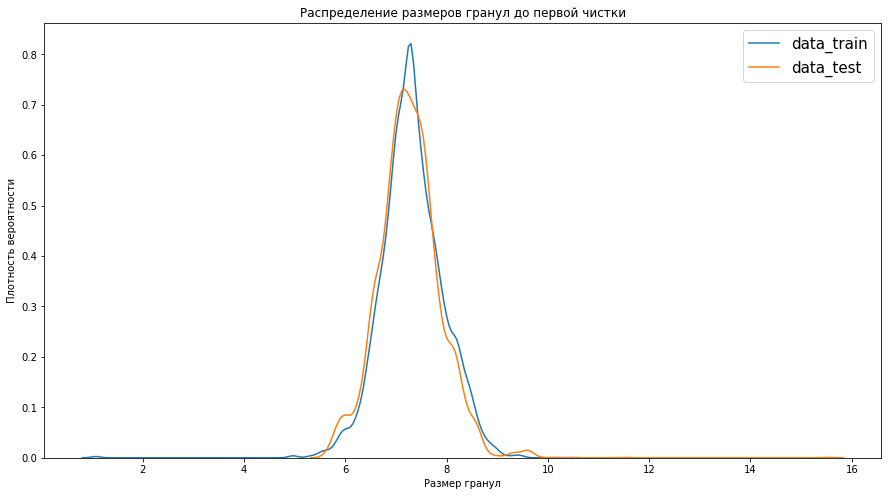

In [13]:
f, ax = plt.subplots(figsize=(15, 8))
ax.set_title('Распределение размеров гранул после первичной обработки')
ax.set_xlabel('Размер гранул')
ax.set_ylabel('Плотность вероятности')

sns.kdeplot(data_train['rougher.input.feed_size'], label='data_train', ax=ax)
sns.kdeplot(data_test['rougher.input.feed_size'], label='data_test', ax=ax)

plt.legend(fontsize = 15)
plt.show()

f, ax = plt.subplots(figsize=(15, 8))

ax.set_title('Распределение размеров гранул до первой чистки')
ax.set_xlabel('Размер гранул')
ax.set_ylabel('Плотность вероятности')

sns.kdeplot(data_train['primary_cleaner.input.feed_size'], label='data_train', ax=ax)
sns.kdeplot(data_test['primary_cleaner.input.feed_size'], label='data_test', ax=ax)

plt.legend(fontsize = 15)
plt.show()

Распределения не сильно отличаются друг от друга.

**Исследование суммарных концентраций всех веществ (Au, Ag, Pb, sol) на разных стадиях: в сырье, в черновом и финальном концентратах**

In [14]:
# концентрация веществ в сырье

data_train['total_rougher.input.feed'] =\
data_train['rougher.input.feed_au'] + data_train['rougher.input.feed_ag'] +\
data_train['rougher.input.feed_pb'] + data_train['rougher.input.feed_sol']

# концентрация веществ в черновом концентратах

data_train['total_rougher.output.concentrate'] =\
data_train['rougher.output.concentrate_au'] + data_train['rougher.output.concentrate_ag'] +\
data_train['rougher.output.concentrate_pb'] + data_train['rougher.output.concentrate_sol']

# концентрация веществ в финальном концентратах

data_train['total_final.output.concentrate'] =\
data_train['final.output.concentrate_au'] + data_train['final.output.concentrate_ag'] +\
data_train['final.output.concentrate_pb'] + data_train['final.output.concentrate_sol']

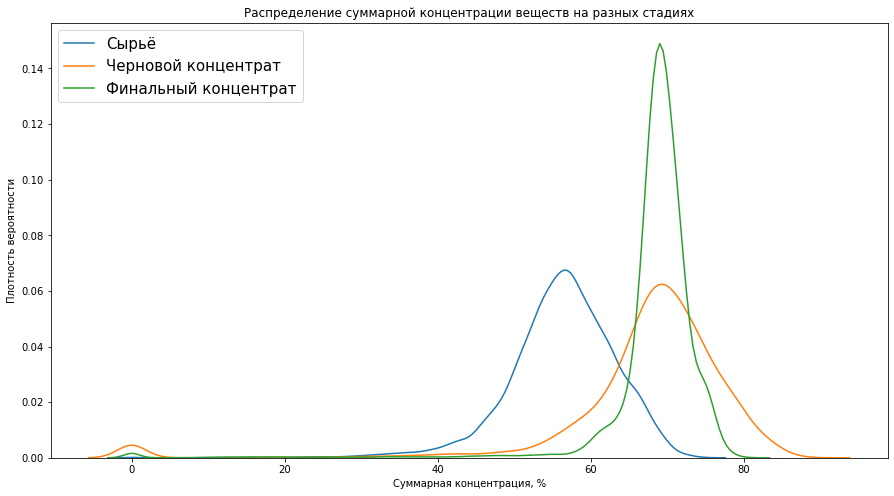

In [15]:
f, ax = plt.subplots(figsize=(15, 8))
ax.set_title('Распределение суммарной концентрации веществ на разных стадиях')
ax.set_xlabel('Суммарная концентрация, %')
ax.set_ylabel('Плотность вероятности')

sns.kdeplot(data_train['total_rougher.input.feed'], label='Сырьё', ax=ax)
sns.kdeplot(data_train['total_rougher.output.concentrate'], label='Черновой концентрат', ax=ax)
sns.kdeplot(data_train['total_final.output.concentrate'], label='Финальный концентрат', ax=ax)
plt.legend(fontsize = 15)
plt.show()

После флотации максимум распределения суммы концентраций металлов сдвинулся в сторону бОльших значений. После второй очистки уменьшился разброс значений суммарной концентрации.

**Удаление строк с нулевыми значениями концентраций**

In [16]:
data_train = data_train[data_train['rougher.input.feed_au'] != 0]
data_train = data_train[data_train['rougher.output.concentrate_au'] != 0]
data_train = data_train[data_train['primary_cleaner.output.concentrate_au'] != 0]
data_train = data_train[data_train['final.output.concentrate_au'] != 0]

data_train = data_train[data_train['rougher.input.feed_ag'] != 0]
data_train = data_train[data_train['rougher.output.concentrate_ag'] != 0]
data_train = data_train[data_train['primary_cleaner.output.concentrate_ag'] != 0]
data_train = data_train[data_train['final.output.concentrate_ag'] != 0]

data_train = data_train[data_train['rougher.input.feed_pb'] != 0]
data_train = data_train[data_train['rougher.output.concentrate_pb'] != 0]
data_train = data_train[data_train['primary_cleaner.output.concentrate_pb'] != 0]
data_train = data_train[data_train['final.output.concentrate_pb'] != 0]

**Вывод**

Исследовано изменение концентраций металлов на различных этапах очистки, распределение размеров гранул сырья и суммарной концентрации веществ на разных стадиях. Удалены строки с нулевой концентрацией металлов.

## Модель

**Разбиение данных на признаки и целевой признак**

In [17]:
features_train = data_train[data_test.columns].drop(['final.output.recovery', 'rougher.output.recovery'], axis=1)
target_train_for = data_train['final.output.recovery']
target_train_ror = data_train['rougher.output.recovery']

features_test = data_test.drop(['final.output.recovery', 'rougher.output.recovery'], axis=1)
target_test_for = data_test['final.output.recovery']
target_test_ror = data_test['rougher.output.recovery']

**Масштабирование признаков**

In [18]:
numeric = features_train.columns

scaler = StandardScaler()
scaler.fit(features_train[numeric])

features_train[numeric] = scaler.transform(features_train[numeric])
features_test[numeric] = scaler.transform(features_test[numeric])

pd.options.mode.chained_assignment = None

**Функции для метрик качества "sMAPE" и "Итоговое sMAPE"**

In [19]:
def smape(t, p):
    return 100/len(p) * np.sum(2 * np.abs(t - p) / (np.abs(p) + np.abs(t))) 

def final_smape(smape_r, smape_f):
    return 0.25 * smape_r + 0.75 * smape_f

smape_scorer = make_scorer(smape, greater_is_better=False)

**Константная модель для проверки качества других моделей**

In [20]:
# предсказания для rougher.output.recovery

model = DummyRegressor()
model.fit(features_train, target_train_ror)
predictions_ror = model.predict(features_test)

# предсказания для final.output.recovery

model = DummyRegressor()
model.fit(features_train, target_train_for)
predictions_for = model.predict(features_test)

smape_r = smape(target_test_ror, predictions_ror)
smape_f = smape(target_test_for, predictions_for)
smape_const = final_smape(smape_r, smape_f)

print(f'Значение sMAPE для "rougher.output.recovery" {smape_r:.4f}')
print(f'Значение sMAPE для "final.output.recovery" {smape_f:.4f}', end='\n\n')
print(f'Значение итогового sMAPE на тестовых данных: {smape_const:.4f}')

Значение sMAPE для "rougher.output.recovery" 9.0634
Значение sMAPE для "final.output.recovery" 10.0839

Значение итогового sMAPE на тестовых данных: 9.8288


**Модель линейной регрессии**

In [21]:
# предсказания для rougher.output.recovery

model = LinearRegression()
scores = cross_val_score(model, features_train, target_train_ror, scoring=smape_scorer, cv=5, n_jobs=-1)
smape_r = - 1 * sum(scores) / len(scores)

# предсказания для final.output.recovery

model = LinearRegression()
scores = cross_val_score(model, features_train, target_train_for, scoring=smape_scorer, cv=5)
smape_f = - 1 * sum(scores) / len(scores)

smape_reg = final_smape(smape_r, smape_f)

print(f'Значение sMAPE для "rougher.output.recovery": {smape_r:.4f}')
print(f'Значение sMAPE для "final.output.recovery": {smape_f:.4f}', end='\n\n')
print(f'Значение итогового sMAPE: {smape_reg:.4f}')

Значение sMAPE для "rougher.output.recovery": 7.2663
Значение sMAPE для "final.output.recovery": 10.9476

Значение итогового sMAPE: 10.0273


**Модель решающего дерева**

In [22]:
%%time

# расчёт для целевого признака "rougher.output.recovery"

parameters = {'max_depth': range(1, 10)}
model= DecisionTreeRegressor(random_state=12345)
tree_grid = GridSearchCV(model, parameters, scoring=smape_scorer, cv=5, n_jobs=-1)
tree_grid.fit(features_train, target_train_ror)

smape_r = -1 * tree_grid.best_score_

# расчёт для целевого признака "final.output.recovery"

parameters = {'max_depth': range(1, 10)}
model= DecisionTreeRegressor(random_state=12345)
tree_grid = GridSearchCV(model, parameters, scoring=smape_scorer, cv=5, n_jobs=-1)
tree_grid.fit(features_train, target_train_for)

smape_f = -1 * tree_grid.best_score_

smape_tree = final_smape(smape_r, smape_f)

print('Лучшие параметры модели для "rougher.output.recovery":', tree_grid.best_params_)
print(f'Значение sMAPE для "rougher.output.recovery": {smape_r:.4f}', end='\n\n')

print('Лучшие параметры модели для "final.output.recovery":', tree_grid.best_params_)
print(f'Значение sMAPE для "final.output.recovery": {smape_f:.4f}', end='\n\n')

print(f'Значение итогового sMAPE: {smape_tree:.4f}')
print()

Лучшие параметры модели для "rougher.output.recovery": {'max_depth': 3}
Значение sMAPE для "rougher.output.recovery": 7.3106

Лучшие параметры модели для "final.output.recovery": {'max_depth': 3}
Значение sMAPE для "final.output.recovery": 9.4296

Значение итогового sMAPE: 8.8999

CPU times: total: 1.81 s
Wall time: 14.1 s


**Модель случайного леса**

In [23]:
%%time

# бОльшие значения параметров не рассматривала, так как очень долго считалось

# расчёт для целевого признака "rougher.output.recovery"

parameters = {'n_estimators': range(10, 21, 2), 'max_depth': range(1, 10)}
model= RandomForestRegressor(random_state=12345)
tree_grid = GridSearchCV(model, parameters, scoring=smape_scorer, cv=5, n_jobs=-1, verbose=10)
tree_grid.fit(features_train, target_train_ror)

smape_r = -1 * tree_grid.best_score_

print('Лучшие параметры модели для "rougher.output.recovery":', tree_grid.best_params_)
print(f'Значение sMAPE для "rougher.output.recovery": {smape_r:.4f}', end='\n\n')

Fitting 5 folds for each of 54 candidates, totalling 270 fits
Лучшие параметры модели для "rougher.output.recovery": {'max_depth': 3, 'n_estimators': 20}
Значение sMAPE для "rougher.output.recovery": 6.6885

CPU times: total: 3.86 s
Wall time: 5min 24s


In [24]:
%%time

# расчёт для целевого признака "final.output.recovery"

parameters = {'n_estimators': range(10, 21, 2), 'max_depth': range(1, 10)}
model= RandomForestRegressor(random_state=12345)
tree_grid = GridSearchCV(model, parameters, scoring=smape_scorer, cv=5, n_jobs=-1, verbose=10)
tree_grid.fit(features_train, target_train_for)

smape_f = -1 * tree_grid.best_score_

print('Лучшие параметры модели для "final.output.recovery":', tree_grid.best_params_)
print(f'Значение sMAPE для "final.output.recovery": {smape_f:.4f}', end='\n\n')

Fitting 5 folds for each of 54 candidates, totalling 270 fits
Лучшие параметры модели для "final.output.recovery": {'max_depth': 4, 'n_estimators': 18}
Значение sMAPE для "final.output.recovery": 8.9546

CPU times: total: 4.25 s
Wall time: 5min 9s


In [25]:
smape_for = final_smape(smape_r, smape_f)
print(f'Значение итогового sMAPE: {smape_for:.4f}')

Значение итогового sMAPE: 8.3881


**Таблица со значениями sMAPE**

In [26]:
tab_data = {'Константная модель (на тестовых данных)': smape_const, 'Линейная регрессия': smape_reg,
            'Дерево решений': smape_tree, 'Случайный лес': smape_for} 
tab = pd.DataFrame(tab_data, index =['Итоговое sMAPE']) 

tab.style.format({'Константная модель (на тестовых данных)': '{:.4f}', 'Линейная регрессия': '{:.4f}', 
                 'Дерево решений': '{:.4f}', 'Случайный лес': '{:.4f}'})

**Вывод**

Моделью с минимальным значением итогового sMAPE является модель cлучайного леса. Также значение итогового sMAPE этой модели меньше значения итогового sMAPE константной модели: 8.3881 против 9.8288.

## Тестирование модели


In [31]:
# предсказания для rougher.output.recovery

model = RandomForestRegressor(random_state=12345, n_estimators = 20, max_depth=3)
model.fit(features_test, target_test_ror)
predictions_ror = model.predict(features_test)

# предсказания для final.output.recovery

model = RandomForestRegressor(random_state=12345, n_estimators = 18, max_depth=4)
model.fit(features_test, target_test_for)
predictions_for = model.predict(features_test)

smape_r = smape(target_test_ror, predictions_ror)
smape_f = smape(target_test_for, predictions_for)

print(f'Метрика sMAPE для "rougher.output.recovery": {smape_r:.4f}')
print(f'Метрика sMAPE для "final.output.recovery": {smape_f:.4f}', end='\n\n')
print(f'Значение итогового sMAPE: {final_smape(smape_r, smape_f):.4f}')

Метрика sMAPE для "rougher.output.recovery": 7.5201
Метрика sMAPE для "final.output.recovery": 8.0900

Значение итогового sMAPE: 7.9475


## Вывод

Моделью с минимальным значением итогового sMAPE является модель случайного леса.<br> Значение итогового sMAPE на тестовой выборке равно 7.9475.

Наиболее оптимальные параметры для предсказания каждого целевого признака:
- для признака "rougher.output.recovery": random_state = 12345, n_estimators = 20, max_depth = 3;
- для признака "final.output.recovery": random_state = 12345, n_estimators = 18, max_depth = 4.